## Desafío - Análisis lineal discriminante

- Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.

- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.

- Desarrollo desafío:

  -El desafío se debe desarrollar de manera Individual.
  
  -Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío Análisis lineal discriminante.
    
## Requerimientos

Trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:

- **`default`**: Variable Binaria. Registra si el cliente entró en morosidad o no.
- **`income`**: Ingreso promedio declarado por el cliente.
- **`balance`**: total del saldo en la cuenta de crédito.
- **`student`**: Variable binaria. Registra si el cliente es estudiante o no.

## Ejercicio 1: Preparación de ambiente de trabajo

- Importe los módulos básicos para el análisis de datos.
- Importe las clases **`LabelEncoder`**, **`StandardScaler`** y **`LabelBinarizer`** de **`preprocessing.`**
- Importe las funciones **`train_test_split`** y **`cross_val_score`** de **`model_selection.`**
- Importe la función **`classification_report de metrics.`**
- Importe las clases **`LinearDiscriminantAnalysis`** y **`QuadraticDiscriminantAnalysis.`**
- **`Agregue la base de datos en el ambiente de trabajo.`**
- Inspeccione la distribución de cada atributo.



In [2]:
# Triada calsica.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Graficos seaborn, warnings y datos perdidos.
import seaborn as sns
import warnings
import missingno as msngo

# Importaciones especificas de este desafio.
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

# Machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# Otras librerias, configuraciones e instancias.
import func as gfx

labelencoder = LabelEncoder()
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('seaborn-darkgrid')

In [3]:
df = pd.read_csv('default_credit.csv').drop(columns = 'index')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
df_describe = df

In [5]:
# Implementamos el método fit_transform astype para trasnformar los valores
df_describe['default'] = labelencoder.fit_transform(df_describe['default'])
df_describe['student'] = labelencoder.fit_transform(df_describe['student'])
df_describe.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


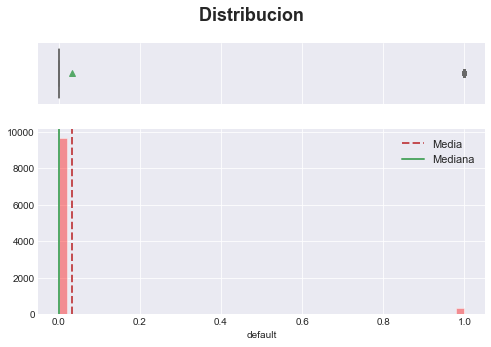

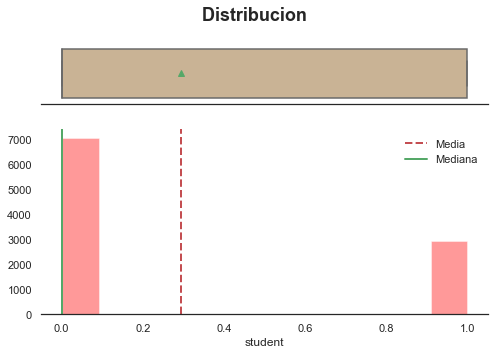

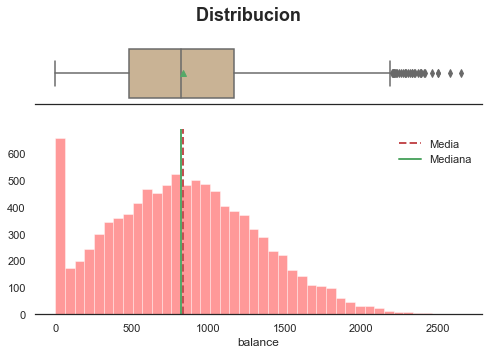

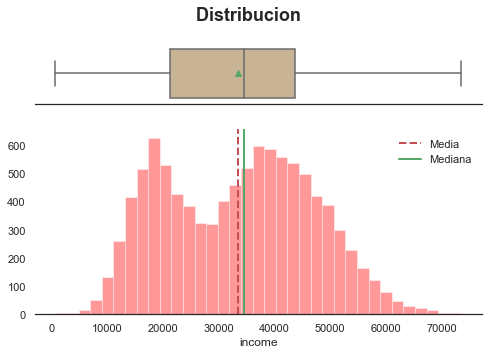

In [6]:
name_vars = ['default', 'student', 'balance', 'income']

for i in range(len(name_vars)):
        gfx.dist_box(df[name_vars[i]])

## Ejercicio 2: Modelo base
- Recuerde que los modelos de **`sklearn`** no soportan datos que no sean numéricos. 
- Transforme los atributos pertinentes con **`LabelEncoder.`**
- Genere muestras de validación y entrenamiento, reservando un 33% de los datos como validación.
- Genere un modelo con **`LinearDiscriminantAnalysis`** sin modificar los hiper parámetros. Genere métricas de evaluación utilizando **`classification_report.`**
- Comente sobre cuál es el desempeño del modelo en cada clase, así como en general.

In [7]:
df_discriminant = df

In [8]:
# recodificación variables categoricas
df_discriminant['default'] = labelencoder.fit_transform(df_discriminant['default'])
df_discriminant['student'] = labelencoder.fit_transform(df_discriminant['student'])
# Para intentar mejorar los resultados se puede estandarizar los valores de estas clases de flotante a entero 
#df_discriminant['balance'] = df_discriminant['balance'].astype(int)
#df_discriminant['income'] = df_discriminant['income'].astype(int)
df_discriminant.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [9]:
df_discriminant['default'].value_counts()

0    9667
1     333
Name: default, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_discriminant.loc[:, 'student':'income'], df_discriminant['default'], test_size = .33, random_state = 15820)
X_train.shape

(6700, 3)

In [11]:
clf_discriminant = LinearDiscriminantAnalysis()
clf_discriminant.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [12]:
# metricas de desempeño
predic = clf_discriminant.predict(X_test)
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3194
           1       0.77      0.28      0.41       106

    accuracy                           0.97      3300
   macro avg       0.87      0.64      0.70      3300
weighted avg       0.97      0.97      0.97      3300



El modelo es muy malo prediciendo los clientes morosos, y muy bueno evaluando a los no morosos, creo que se deben tratar mejor los datos ampliando de alguan forma la base de datos, ya que las muestras estan desbalanceada

## Ejercicio 3: Refactorización 1 - información a priori
- Dado que trabajamos con modelos generativos, podemos incluir información exógena. Para este caso agregaremos dos distribuciones:
    - Asumamos que hay un 50/50 de morosos y no morosos.
    - Asumamos que hay un 60/40 de morosos y no morosos.
- Por cada modelo, reporte las métricas de clasificación.

In [13]:
# Asumamos que hay un 50/50 de morosos y no morosos.
linear_discriminant = LinearDiscriminantAnalysis(priors = [50, 50])
linear_discriminant.fit(X_train, y_train)

LinearDiscriminantAnalysis(priors=[50, 50])

In [14]:
# metricas de desempeño
predic1 = linear_discriminant.predict(X_test)
print(classification_report(y_test, predic1))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91      3194
           1       0.15      0.91      0.26       106

    accuracy                           0.84      3300
   macro avg       0.57      0.87      0.58      3300
weighted avg       0.97      0.84      0.89      3300



In [15]:
# Asumamos que hay un 60/40 de morosos y no morosos.
linear_discriminant1 = LinearDiscriminantAnalysis(priors = [60, 40])
linear_discriminant1.fit(X_train, y_train)

LinearDiscriminantAnalysis(priors=[60, 40])

In [16]:
# metricas de desempeño
predic2 = linear_discriminant.predict(X_test)
print(classification_report(y_test, predic2))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91      3194
           1       0.15      0.91      0.26       106

    accuracy                           0.84      3300
   macro avg       0.57      0.87      0.58      3300
weighted avg       0.97      0.84      0.89      3300



## Ejercicio 4: Refactorización 2 - oversampling
### Digresión: Synthetic Over(Under)Sampling
- Por lo general podemos intentar aliviar el problema del desbalance de clases
  mediante la ponderación dentro del algoritmo. Otra alternativa es el muestreo con
  reemplazo dentro de los conjuntos de entrenamiento. Estos métodos clásicos se
  conocen como **`Oversampling`** cuando repetimos registros aleatorios de la clase
  minoritaria, y **`Undersampling`** cuando eliminamos aleatoriamente registros de la
  clase mayoritaria.
- Un contratiempo de estos métodos clásicos es que pueden replicar información
  sesgada que afecte el desempeño de generalización del modelo. Si los datos son
  malos, estaremos replicando estas fallas.
- Otra solución es generar ejemplos de entrenamiento sintéticos mediante el
  entrenamiento de ejemplos de la clase minoritaria. A grandes rasgos la solución
  funciona de la siguiente forma: En función a un subconjunto de datos
  correspondientes a la clase minoritaria, entrenamos algún modelo no supervisado o
  generativo como Naive Bayes, KMeans o KNearestNeighbors para generar
  representaciones sintéticas de los datos en el espacio de atributos de la clase
  específica mediante 𝑥 es un ejemplo de
  𝑛𝑢𝑒𝑣𝑜−𝑒𝑗𝑒𝑚𝑝𝑙𝑜 = 𝑥 𝑖 + λ(𝑥 𝑧𝑖 − 𝑥 𝑖) entrenamiento de la clase minoritaria y λ es un parámetro de interpolación    aleatorio λ ∼ 𝑈𝑛𝑖𝑓𝑜𝑟𝑚𝑒(0, 1).
  
- Uno de los problemas más graves de esta base de datos, es el fuerte desbalance
  entre clases. Ahora generaremos observaciones sintéticas mediante SMOTE
  (Synthetic Minority Oversampling Technique). Para ello, debemos agregar el paquete
  a nuestro ambiente virtual. En nuestro terminal agregamos conda install -c
  conda-forge imbalanced-learn. Incorpore SMOTE en el ambiente de trabajo con
  la siguiente sintáxis from imblearn.over_sampling import SMOTE.
  
- Para implementar oversampling, debemos generar nuevos objetos que representan
  nuestra muestra de entrenamiento incrementada artificialmente. Para ello
  implemente la siguiente sintaxis:



In [17]:
# Instanciamos la clase
oversampler = SMOTE(sampling_strategy = 'minority', random_state = 15820)# , ratio='minority'
# generamos el eversampling de la matriz de entrenamiento y
X_train_oversamp, y_train_oversamp = oversampler.fit_resample(X_train, y_train)

In [18]:
print(f'''
Datos de validacion {sorted(Counter(y_train).items())}
Salida oversampler {sorted(Counter(y_train_oversamp).items())}
''')


Datos de validacion [(0, 6473), (1, 227)]
Salida oversampler [(0, 6473), (1, 6473)]



In [19]:
linear_discriminant_o = LinearDiscriminantAnalysis()
linear_discriminant_o.fit(X_train_oversamp, y_train_oversamp)

LinearDiscriminantAnalysis()

In [20]:
predic_oversample = linear_discriminant_o.predict(X_test)
print(classification_report(y_test, predic_oversample))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3194
           1       0.16      0.89      0.27       106

    accuracy                           0.84      3300
   macro avg       0.58      0.86      0.59      3300
weighted avg       0.97      0.84      0.89      3300



- Vuelva a entrenar el modelo con los datos aumentados de forma artificial y comente sobre su desempeño.

In [21]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_oversamp, y_train_oversamp)

LinearDiscriminantAnalysis()

In [22]:
# metricas de desempeño
predic_lda = lda.predict(X_test)
print(classification_report(y_test, predic_lda))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3194
           1       0.16      0.89      0.27       106

    accuracy                           0.84      3300
   macro avg       0.58      0.86      0.59      3300
weighted avg       0.97      0.84      0.89      3300



## Ejercicio 5: Refactorización 3 - QDA
- Por último, implemente un modelo **`QuadraticDiscriminantAnalysis`** con los datos aumentados artificialmente. Genere las métricas de desempeño.
- Comente a grandes rasgos sobre el mejor modelo en su capacidad predictiva.


In [23]:
model_q = QuadraticDiscriminantAnalysis()
model_q.fit(X_train_oversamp, y_train_oversamp)

QuadraticDiscriminantAnalysis()

In [24]:
predic_q = linear_discriminant.predict(X_test)
print(classification_report(y_test, predic_q))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91      3194
           1       0.15      0.91      0.26       106

    accuracy                           0.84      3300
   macro avg       0.57      0.87      0.58      3300
weighted avg       0.97      0.84      0.89      3300

